# Final Project

Import libraries

In [95]:
import pandas as pd
import numpy as np
from glob import glob
import json
import string
import re
# import nltk
# nltk.download()  # This is used if you do not have nltk and its files downloaded on your computer.
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

#### Read in data

In [119]:
filenames = glob("./biorxiv_medrxiv/biorxiv_medrxiv/*.json")
filenames2 = glob("./comm_use_subset/comm_use_subset/*.json")
filenames3 = glob("./custom_license/custom_license/*.json")
filenames4 = glob("./noncomm_use_subset/noncomm_use_subset/*.json")

In [120]:
data1 = [json.load(open(file)) for file in filenames]
print('Finished Data1 ...')

# The following files are really big.  It will take a while to run through these files.

# data2 = [json.load(open(file)) for file in filenames2]
# print('Finished Data2 ...')
# data3 = [json.load(open(file)) for file in filenames3]
# print('Finished Data3 ...')
# data4 = [json.load(open(file)) for file in filenames4]
# print('Finished Data4 ...')

Finished Data1 ...


In [121]:
data = data1 #+ data2 #+ data3 + data4

### Function
fileData = an opened json file

keyWords = words to look for

radius = search distance from keywords

In [122]:
def getWords(fileData, keyWords, radius):
    myString = ' '
    punc = string.punctuation + '′'
    table = str.maketrans('', '', punc)
    extra_words = set(stopwords.words('english'))
    porter = PorterStemmer()

#     print('[0/9] Get Strings ...')

    stringList = []
#     for text in file['abstract']:
#         stringList.append(text['text'])
    for text in file['body_text']:
        stringList.append(text['text'])

#     print('[1/9] Combine Strings ...')        
    myString = myString.join(stringList)

#     print('[2/9] Removing Punctuation ...')
    myWords = re.split(r'(/|-|;|,|\s)\s*', myString)
    # display(myWords)
    myWords = [word.translate(table) for word in myWords if word != ' ']

#     print('[3/9] Make Lowercase ...')
    myWords = [word.lower() for word in myWords]

#     print('[4/9] Removing Numbers ...')
    myWords = [word for word in myWords if word.isalpha()]

#     print('[5/9] Removing Common Words ...')
    myWords = [word for word in myWords if not word in extra_words]

    
    ### This section takes a long time to run through.
#     print('[6/9] Stemming Words ... (This one might take a while)')
#     myWords = [porter.stem(word) for word in myWords]
    ###
    

#     print('[7/9] Finding Key Words ...')
    poses = []
    for i in range(len(myWords)):
        if myWords[i] in keyWords:
            poses.append(i)

#     print('[8/9] Getting Shorter List ...')
    words = []
    dist = radius
    for i in range(len(poses)):
        startPos = -1
        endPos = -1

        if i > 0:
            if poses[i] - poses[i-1] > dist:
                startPos = poses[i] - dist
            else:
                startPos = poses[i] - int((poses[i] - poses[i-1])/2)
        else:
            if poses[i] - dist >= 0:
                startPos = poses[i] - dist
            else:
                startPos = 0

        if i < len(poses)-1:
            if poses[i+1] - poses[i] > dist:
                endPos = poses[i] + dist
            else:
                endPos = poses[i] + int((poses[i+1] - poses[i])/2)
        else:
            if poses[i] + dist < len(poses):
                endPos = poses[i] + dist
            else:
                endPos = len(poses)-1

    #     print('[{}/{}] ...'.format(i, len(poses)))
    #     print(startPos, poses[i], endPos)
        words = words + myWords[startPos:endPos]
    #     print(myWords[startPos:endPos])

#     print('[9/9] Done!')
    
    return words
    # print(words)

### Run the function

In [123]:
wordsFound = []
keyWords = ['factors', 'symptoms', 'risk', 'risks', 'symptom', 'factor']
radius = 20

for i in range(len(data)):
    if i % 100 == 0:
        print('[{}/{}]'.format(i, len(data)))
    wordsFound = wordsFound + getWords(data[1], keyWords, radius)

# Counts the number of times a word is used.
wordCounts = {}
for word in wordsFound:
    if word in wordCounts:
        wordCounts[word] = wordCounts[word] + 1
    else:
        wordCounts[word] = 1
        
wordCounts = sorted(wordCounts.items(), key=lambda x: x[1], reverse=True)

wordCounts = [i for i in wordCounts if i[0] not in keyWords]
    
wordCounts[0:20]

[0/1053]
[100/1053]
[200/1053]
[300/1053]
[400/1053]
[500/1053]
[600/1053]
[700/1053]
[800/1053]
[900/1053]
[1000/1053]


[('dengue', 10530),
 ('samples', 8424),
 ('viruses', 7371),
 ('virus', 6318),
 ('infection', 6318),
 ('cases', 5265),
 ('fever', 5265),
 ('serum', 4212),
 ('negative', 4212),
 ('one', 4212),
 ('illness', 4212),
 ('hhv', 4212),
 ('sequences', 3159),
 ('known', 3159),
 ('divergent', 3159),
 ('acute', 3159),
 ('patients', 3159),
 ('presented', 3159),
 ('positive', 3159),
 ('like', 3159)]

### Graph Results

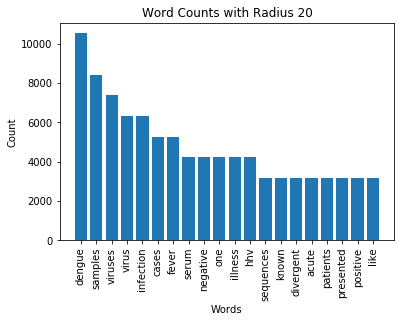

In [125]:
plt.figure()
plt.bar([i[0] for i in wordCounts[0:20]], [i[1] for i in wordCounts[0:20]])
plt.title('Word Counts with Radius {}'.format(radius))
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()